# CS4243 Week 10
### Part 1: Coursework 2 answer
- b
- a 
- d

### Part 2: Function Estimation Using an ANN

### Goal:
- Test underfitting and Overfitting 
- Learn Tensorflow / PyTorch 
- Choose your prefered deep learning language and implement the requirement

### Tensorflow:


In [2]:
# Function estimation using neural network, libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import numpy as np

from numpy import asarray
from matplotlib import pyplot as plt
import math as m
import random as r
import pandas as pd

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [4]:
# define the function: noisy sine signal, 1d, defined between -10 and 10, step is 0.1
# y = F(x)
#

x = np.arange(-10,10,0.1)
#noisy version
y = asarray([ 2.5*m.sin(0.4*m.pi*i + 1.12) + 1.3*m.sin(0.17*m.pi*i + 3.1) + 2*r.random()   for i in x ])
#noise-less version
#y = asarray([ 2.5*m.sin(0.4*m.pi*i + 1.12) + 1.3*m.sin(0.17*m.pi*i + 3.1)  for i in x ])

print('min and max=' , x.min(), x.max(), y.min(), y.max())
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))


min and max= -10.0 9.899999999999928 -3.424548871617838 4.9981044671316095


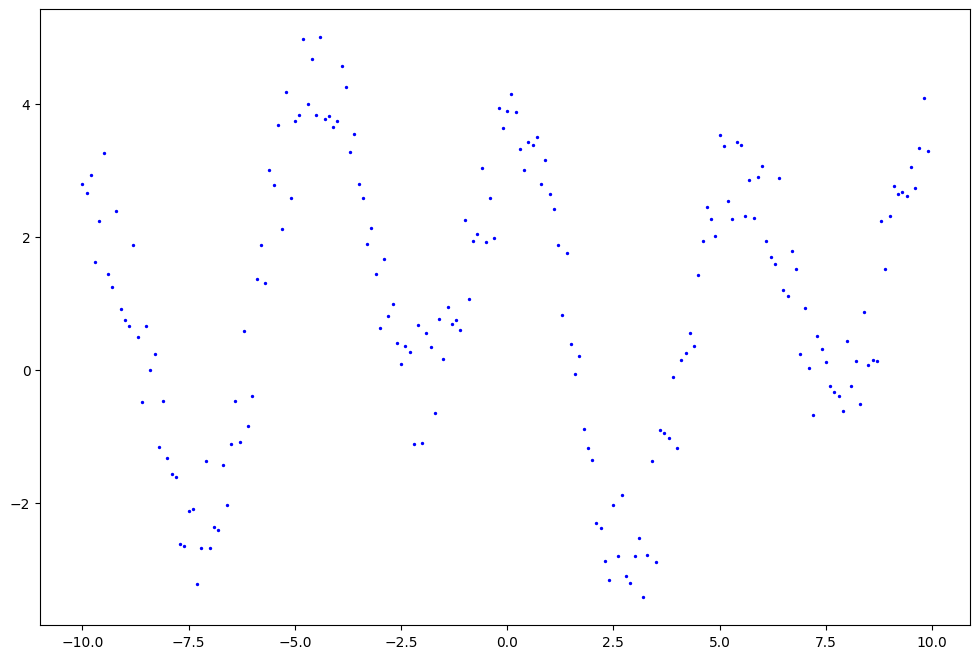

In [5]:
plt.figure(figsize= (12,8))
plt.scatter(x, y, c='blue', s=2)



### Things to do:
- Underfititng: 1x5x15x5x15x1 , epochs~=20,
- Underfititng: 1x5x15x5x15x1 , epochs~=200 , no activation function
- Underfititng: 1x1x1x1 , epochs~=200, relu



Epoch 1/200
20/20 [==============================] - 1s 4ms/step - loss: 4.5965
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 4.2769
Epoch 3/200
20/20 [==============================] - 0s 5ms/step - loss: 4.2059
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 4.0937
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 3.9608
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 3.8705
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 3.9077
Epoch 8/200
20/20 [==============================] - 0s 4ms/step - loss: 3.8064
Epoch 9/200
20/20 [==============================] - 0s 4ms/step - loss: 3.7934
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 3.7620
Epoch 11/200
20/20 [==============================] - 0s 5ms/step - loss: 3.7256
Epoch 12/200
20/20 [==============================] - 0s 4ms/step - loss: 3.7197
Epoch 13/200
20/20 [=================

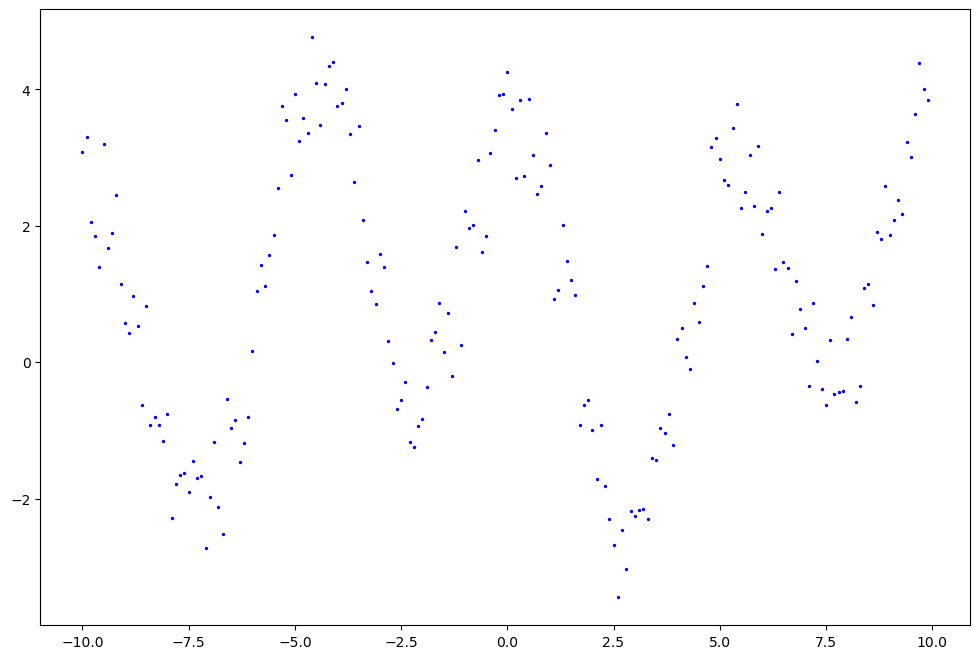

In [3]:

# plot the function y=F(x)
#plt.plot(x, y, color='blue', marker='o', linewidth=1, markersize=2)
plt.figure(figsize= (12,8))
plt.scatter(x, y, c='blue', s=2)

# design the neural network model
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu' , kernel_initializer='he_uniform'))
model.add(Dense(15, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(15, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
# fit/train the model on the training dataset
model.fit(x, y, epochs=200, batch_size=10, verbose=1, shuffle=True)
# make predictions for the input data
yhat = model.predict(x)



MSE::: 1.942
Root MSE::: 1.394
MAE::: 1.150


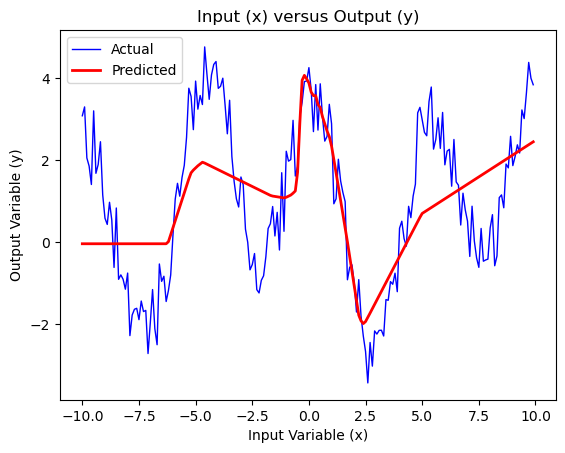

In [4]:
# report model error
print('MSE::: %.3f' % mean_squared_error(y, yhat))
print('Root MSE::: %.3f' % mean_squared_error(y ,yhat) **0.5)
print('MAE::: %.3f' % mean_absolute_error(y, yhat))
# plot x vs y
plt.plot(x, y, color='blue', linewidth=1, label='Actual')
# plot x vs yhat
plt.plot(x, yhat, color='red', linewidth=2, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

2/2 [==============================] - 0s 8ms/step


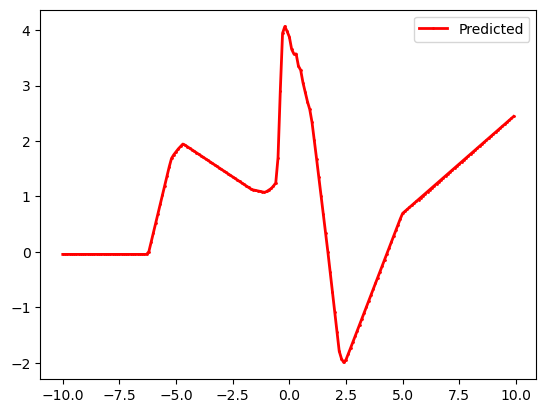

In [5]:
# now we change the input range and step to check
# the generality/interpolation of the model with respect to
# unseen data samples. 
xp = np.arange(-7.1, 7.1, 0.37)
M=xp.shape
xp = np.resize(xp,[ M[0],1 ])
yhatp = model.predict(xp)

plt.plot(x, yhat, color='red', linewidth=2, label='Predicted' , marker='.' ,markersize=2)
plt.legend()
plt.show()


### PyTorch:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random as r
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
# Generate data
x = np.arange(-10,10,0.1)
y = np.asarray([2.5*m.sin(0.4*m.pi*i + 1.12) + 1.3*m.sin(0.17*m.pi*i + 3.1) + 2*r.random() for i in x])

# Convert data to PyTorch tensors
x_tensor = torch.FloatTensor(x).view(-1, 1)
y_tensor = torch.FloatTensor(y).view(-1, 1)
# x=torch.tensor(x)
# y=torch.tensor(y)

In [2]:
# Define the neural network model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 15)
        self.fc3 = nn.Linear(15, 5)
        self.fc4 = nn.Linear(5, 15)
        self.fc5 = nn.Linear(15, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # x = self.relu(self.fc1(x))
        # x = self.relu(self.fc2(x))
        # x = self.relu(self.fc3(x))
        # x = self.relu(self.fc4(x))
        # x = self.fc5(x)
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        x=self.fc4(x)
        x=self.fc5(x)
        return x

model = Model()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

100%|██████████| 20/20 [00:00<00:00, 810.54it/s]

MSE::: 4.30093103788758
Root MSE::: 2.0738686163514743
MAE::: 1.735630554759308


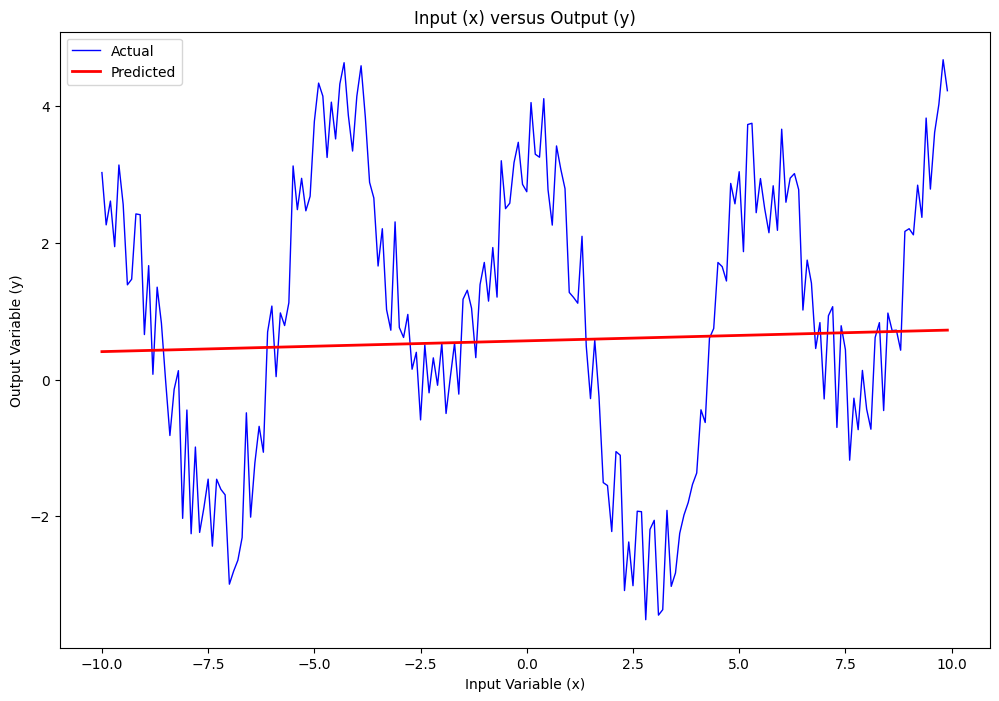

In [5]:
# Training the model
epochs = 20
for epoch in tqdm(range(epochs)):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()
    # if epoch % 20 == 0:
    #     print(f'Epoch {epoch}, Loss: {loss.item()}')

# Predictions
model.eval()
with torch.no_grad():
    yhat = model(x_tensor).numpy()
    
mse = np.mean((yhat - y)**2)
print('MSE:::', mse)
print('Root MSE:::', np.sqrt(mse))
mae = np.mean(np.abs(yhat - y))
print('MAE:::', mae)

# Plotting
plt.figure(figsize=(12,8))
plt.plot(x, y, color='blue', linewidth=1, label='Actual')
# plot x vs yhat
plt.plot(x, yhat, color='red', linewidth=2, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

### Download Link:
- PyTorch: https://pytorch.org/get-started/locally/
- Tensorflow: https://www.tensorflow.org/install?hl=zh-cn

## TODO:
- Underfititng: 1x1x1x1 , epochs~=200, relu
- to make an overfitting we go for: 1x50x50x50x50x1 , epochs ~= 30000
- to keep it good we go for: 1x15x5x15x1 , epochs~=2000, 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random as r
import torch
import  torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
# Generate data
x = np.arange(-10,10,0.1)
y = np.asarray([2.5*m.sin(0.4*m.pi*i + 1.12) + 1.3*m.sin(0.17*m.pi*i + 3.1) + 2*r.random() for i in x])

# Convert data to PyTorch tensors
x_tensor = torch.FloatTensor(x).view(-1, 1)
y_tensor = torch.FloatTensor(y).view(-1, 1)

In [11]:
# Define the neural network model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1, 15)
        self.fc2 = nn.Linear(15, 5)
        self.fc3 = nn.Linear(5, 1) 
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x=self.fc3(x)
   
        return x

model = Model()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

100%|██████████| 2000/2000 [00:01<00:00, 1564.18it/s]


MSE::: 7.164551576137328
Root MSE::: 2.6766679988630133
MAE::: 2.1773535380085307


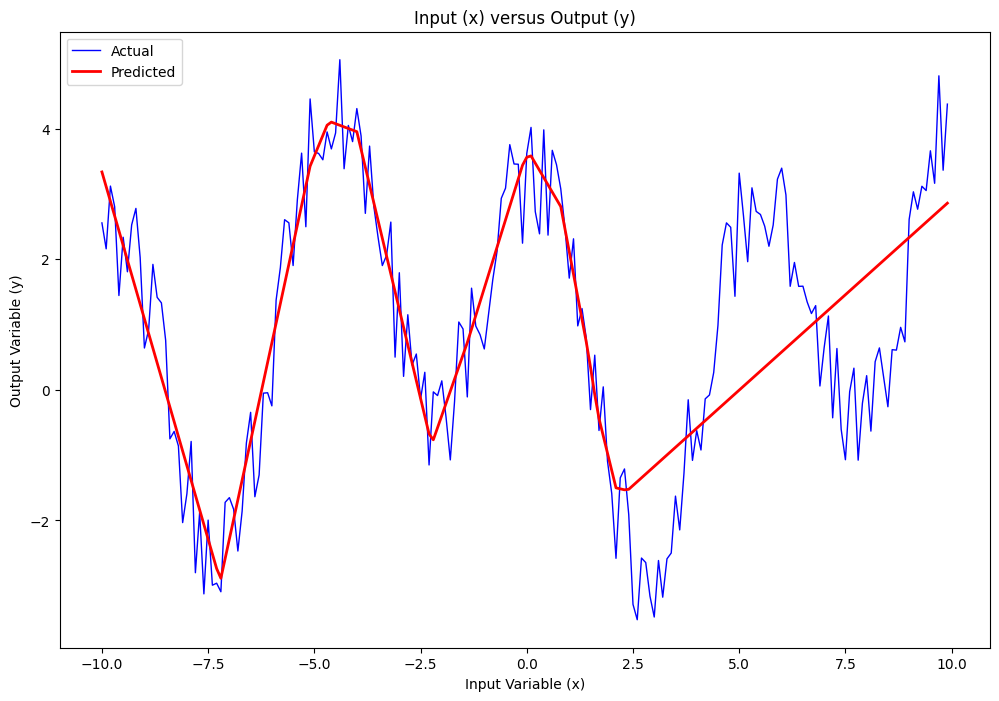

In [12]:
# Training the model
epochs = 2000
for epoch in tqdm(range(epochs)):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()
    # if epoch % 20 == 0:
    #     print(f'Epoch {epoch}, Loss: {loss.item()}')

# Predictions
model.eval()
with torch.no_grad():
    yhat = model(x_tensor).numpy()
    
mse = np.mean((yhat - y)**2)
print('MSE:::', mse)
print('Root MSE:::', np.sqrt(mse))
mae = np.mean(np.abs(yhat - y))
print('MAE:::', mae)

# Plotting
plt.figure(figsize=(12,8))
plt.plot(x, y, color='blue', linewidth=1, label='Actual')
# plot x vs yhat
plt.plot(x, yhat, color='red', linewidth=2, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

In [13]:
# Define the neural network model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc4 = nn.Linear(50, 50)
        self.fc5 = nn.Linear(50, 1)
        # self.fc3 = nn.Linear(5, 1) 
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)

        return x

model = Model()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

100%|██████████| 30000/30000 [00:54<00:00, 552.96it/s]


MSE::: 8.309200815877073
Root MSE::: 2.882568440796692
MAE::: 2.333204137613681


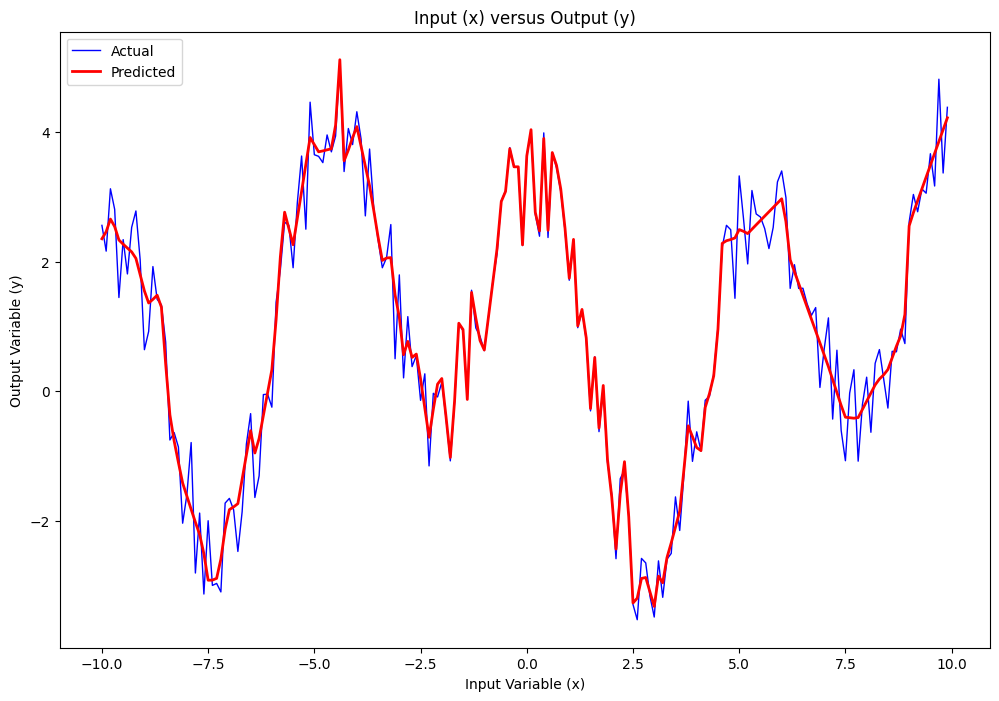

In [14]:
# Training the model
epochs = 30000
for epoch in tqdm(range(epochs)):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()
    # if epoch % 20 == 0:
    #     print(f'Epoch {epoch}, Loss: {loss.item()}')

# Predictions
model.eval()
with torch.no_grad():
    yhat = model(x_tensor).numpy()
    
mse = np.mean((yhat - y)**2)
print('MSE:::', mse)
print('Root MSE:::', np.sqrt(mse))
mae = np.mean(np.abs(yhat - y))
print('MAE:::', mae)

# Plotting
plt.figure(figsize=(12,8))
plt.plot(x, y, color='blue', linewidth=1, label='Actual')
# plot x vs yhat
plt.plot(x, yhat, color='red', linewidth=2, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()